In [1]:
import os
train_horse_dir = os.path.join('./horse-or-human/horses')
train_human_dir = os.path.join('./horse-or-human/humans')

In [2]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

print(train_horse_names[:10])
print(train_human_names[:10])

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png', 'human05-22.png', 'human02-03.png', 'human02-17.png', 'human15-27.png', 'human12-12.png']


In [3]:
# total number of horse and human images in directories
print("Total training horse images: ", len(os.listdir(train_horse_dir)))
print("Total training human images: ", len(os.listdir(train_human_dir)))

Total training horse images:  500
Total training human images:  527


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters for graph; we'll output images in a 4x4 config
nrows = 4
ncols = 4

# index for iterating over images
pic_index = 0

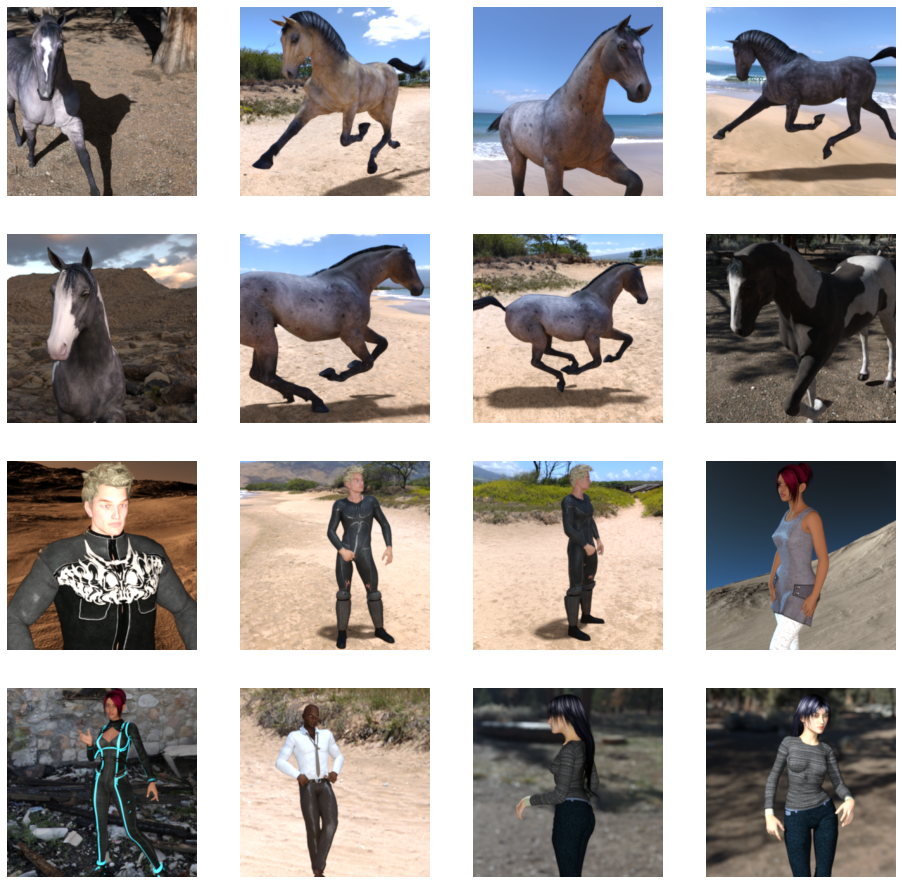

In [5]:
# Setting up a matplotlib fig, and size it to fit 4x4 images
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                  for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                  for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    # Set subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [6]:
# Setting up model architecture
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses')
    # and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-02-07 19:51:34.055504: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [8]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

#Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    './horse-or-human',
    target_size=(300, 300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [10]:
# Training
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=2
)

Epoch 1/15
8/8 - 29s - loss: 1.9975 - accuracy: 0.5295 - 29s/epoch - 4s/step
Epoch 2/15
8/8 - 31s - loss: 0.6169 - accuracy: 0.7152 - 31s/epoch - 4s/step
Epoch 3/15
8/8 - 25s - loss: 0.5868 - accuracy: 0.7864 - 25s/epoch - 3s/step
Epoch 4/15
8/8 - 27s - loss: 0.2431 - accuracy: 0.9004 - 27s/epoch - 3s/step
Epoch 5/15
8/8 - 23s - loss: 0.3298 - accuracy: 0.8565 - 23s/epoch - 3s/step
Epoch 6/15
8/8 - 22s - loss: 0.4087 - accuracy: 0.8754 - 22s/epoch - 3s/step
Epoch 7/15
8/8 - 23s - loss: 0.1151 - accuracy: 0.9655 - 23s/epoch - 3s/step
Epoch 8/15
8/8 - 23s - loss: 0.2596 - accuracy: 0.9021 - 23s/epoch - 3s/step
Epoch 9/15
8/8 - 22s - loss: 0.0383 - accuracy: 0.9878 - 22s/epoch - 3s/step
Epoch 10/15
8/8 - 24s - loss: 0.0320 - accuracy: 0.9900 - 24s/epoch - 3s/step
Epoch 11/15
8/8 - 22s - loss: 0.0313 - accuracy: 0.9900 - 22s/epoch - 3s/step
Epoch 12/15
8/8 - 23s - loss: 0.7265 - accuracy: 0.9355 - 23s/epoch - 3s/step
Epoch 13/15
8/8 - 22s - loss: 0.3253 - accuracy: 0.9155 - 22s/epoch - 3s/

In [16]:
# We can download and add pictures from the internet to our images folder and use them as predictions
import numpy as np
from keras.preprocessing import image
images = os.listdir("./images")
print(images)

for i in images:
    print()
    # predicting images
    path = './images/' + i
    img = image.load_img(path, target_size=(300, 300))
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(i + " is a human")
    else:
        print(i + " is a horse")

['test4.jpg', 'test1.jpg', 'test3.jpg', 'mike-tyson.jpg', 'test2.1.jpg']

[0.05248725]
test4.jpg is a horse

[4.0470909e-16]
test1.jpg is a horse

[1.]
test3.jpg is a human

[1.]
mike-tyson.jpg is a human

[1.1201494e-27]
test2.1.jpg is a horse


/var/folders/_c/_5qmw0cn7z1931y9d51l3cww0000gn/T/ipykernel_37169/3670397800.py:45: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


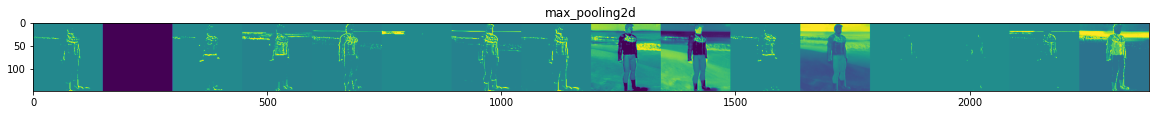

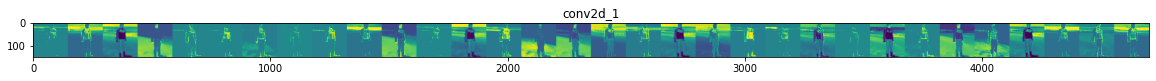

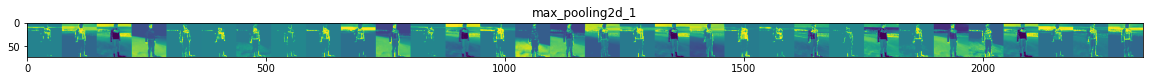

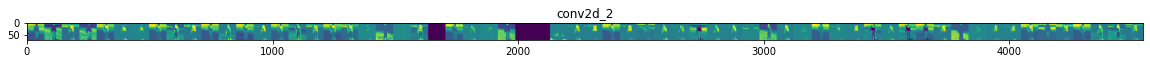

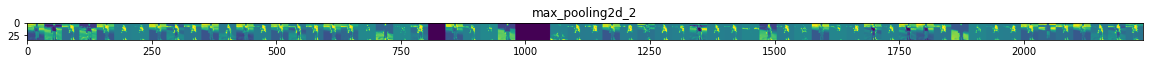

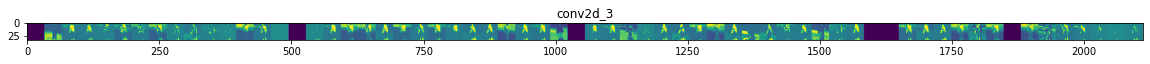

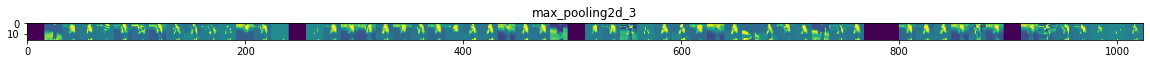

In [17]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [18]:
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [19]:
validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

VAL SET HORSES: ['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png', 'horse5-018.png', 'horse1-170.png', 'horse5-192.png', 'horse1-411.png', 'horse4-232.png', 'horse3-070.png']
VAL SET HUMANS: ['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png', 'valhuman01-10.png', 'valhuman01-11.png', 'valhuman01-05.png', 'valhuman03-14.png', 'valhuman03-00.png']


In [20]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


In [21]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

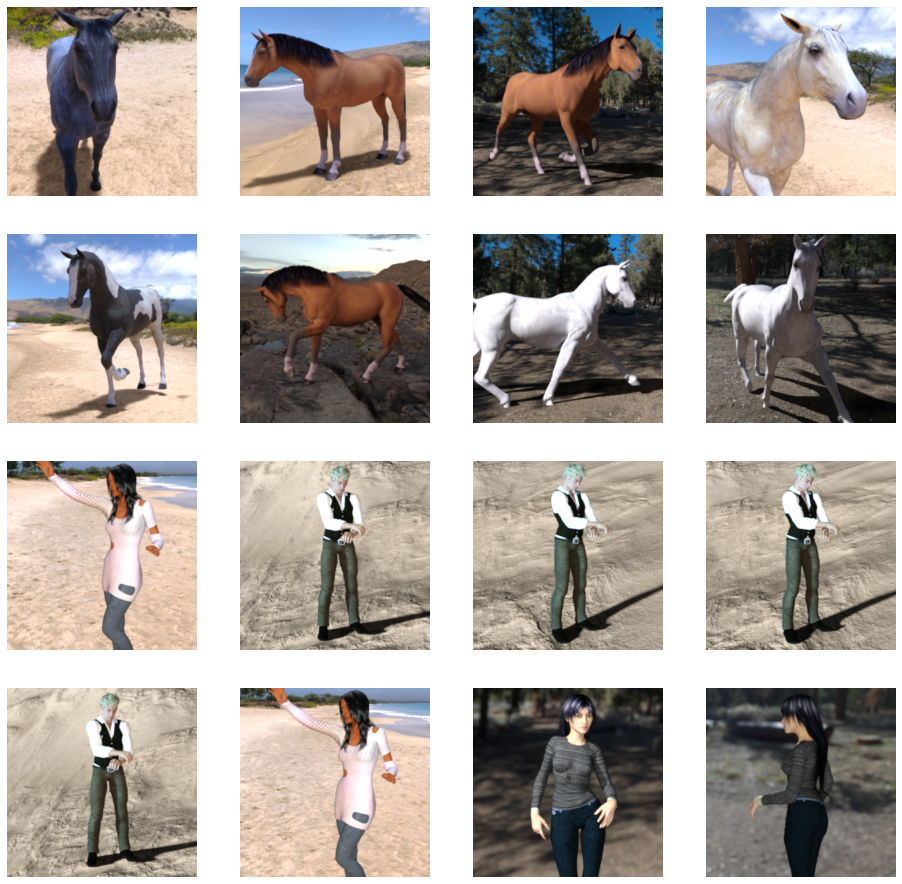

In [23]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [24]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 35, 64)      

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [27]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [28]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 38s 4s/step - loss: 1.0664 - accuracy: 0.5551 - val_loss: 0.6304 - val_accuracy: 0.5234
Epoch 2/15
8/8 [==============================] - 34s 4s/step - loss: 0.7072 - accuracy: 0.6055 - val_loss: 1.0085 - val_accuracy: 0.5547
Epoch 3/15
8/8 [==============================] - 27s 3s/step - loss: 0.9237 - accuracy: 0.6474 - val_loss: 0.6906 - val_accuracy: 0.7852
Epoch 4/15
8/8 [==============================] - 31s 3s/step - loss: 0.3981 - accuracy: 0.8496 - val_loss: 0.7409 - val_accuracy: 0.8633
Epoch 5/15
8/8 [==============================] - 25s 3s/step - loss: 0.2369 - accuracy: 0.8966 - val_loss: 2.6776 - val_accuracy: 0.7109
Epoch 6/15
8/8 [==============================] - 27s 3s/step - loss: 0.2106 - accuracy: 0.9288 - val_loss: 1.5085 - val_accuracy: 0.8398
Epoch 7/15
8/8 [==============================] - 26s 3s/step - loss: 0.2624 - accuracy: 0.8899 - val_loss: 1.2667 - val_accuracy: 0.7539
Epoch 8/15
8/8 [==================